# Trabajo Práctico 4 - Machine Learning
*Felicitas marolda*

## Parte 1: Clustering de datos
Para el dataset clustering.csv realizar los siguientes análisis:

a) Implementar el algoritmo K-means y determinar la cantidad de clusters con el método de
“ganancias decrecientes” (graficar L vs. K, y elegir un valor K donde al aumentar K deje
de reducir significativamente L, donde L es la suma de las distancias). Graficar el conjunto
de datos xi mostrando a qué cluster pertenece cada dato (usando colores/marcadores
distintos para cada cluster) y también mostrar el centroide de cada cluster.

b) Implementar el algoritmo Gaussian Mixture Model (GMM) y realizar la misma tarea que
en el inciso anterior. Recuerde que puede inicializar la optimización de GMM con una
corrida de K-means.


c) Implementar el algoritmo DBSCAN y aplicarlo al conjunto de datos. Explorar el efecto
de variar los parámetros ϵ (radio de la vecindad) y K (mínimo número de puntos en
una zona densa). Luego, elegir una combinación razonable de ϵ y K y graficar los datos
mostrando a qué cluster pertenece cada uno, utilizando colores/marcadores distintos para
cada cluster/ruido.

In [ ]:
import pandas as pd
import numpy as np
import importlib

import src.algoritmos as alg
import src.auxiliares as aux

In [20]:
np.random.seed(241204)

In [2]:
# cargamos datasets
clustering_csv = pd.read_csv('data/clustering.csv')
mnist_csv = pd.read_csv('data/MNIST_dataset.csv')

# drop primera columna
clustering_csv = clustering_csv.drop(clustering_csv.columns[0], axis=1)


In [3]:
# pasamos a numpy
clustering = clustering_csv.values
mnist = mnist_csv.values

distancias:  [1510470747.6451018, 1110265268.0165484, 877777698.811023, 738575425.0741475, 661577176.9264648, 595450108.9316212, 553610101.645266, 492540763.50272006, 455138628.90725476, 415960097.6305115]


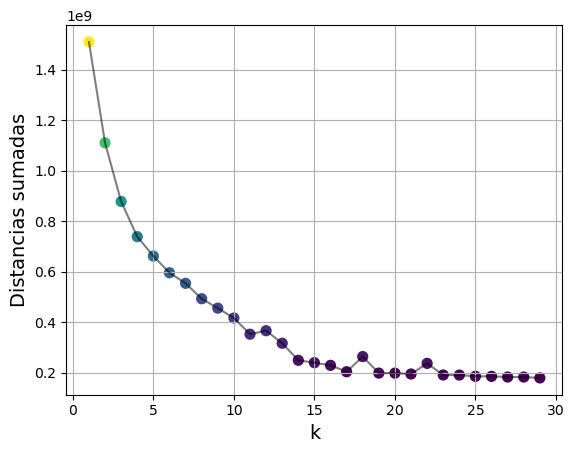

In [22]:
importlib.reload(alg)
importlib.reload(aux)

k_values = range(1,30)

distances_k = []
for k in k_values:
    centroids, labels = alg.k_means(clustering, k)
    distances = aux.get_distances_sum(clustering, labels, centroids)
    distances_k.append(distances)

print("distancias: ", distances_k[:10])
aux.graph(k_values, distances_k, 'k', 'Distancias sumadas')